# Wine Quality Prediction using Linear Regression
<p>In this notebook I have tried to predict the wine quality.</p>
<p>I have selected a dataset which consist details of wine quality. I got this dataset from the link https://archive.ics.uci.edu/dataset/186/wine+quality. In this dataset we have two separate csv files which have details of red and white wine separately.</p>
<p>Initially I directly loaded the data from the csv using basic read_csv functionality of pandas. But the data in csv was separated with semi-colon (;) instead of comma (,). So I specified the separator parameter as semi-colon in read_csv which solved the issue and loaded the data perfectly.The dataset contains two csv one with white wine details and another with white wine details. As we are going to find the quality of the wine wholly without category check we have unioned the data.</p>
<img src="https://github.com/sneha-cg/ML/blob/main/Linear%20Regression/Wine%20Quality/wine_params.PNG?raw=true" alt="Parameter definition" />
<p><b>Only after studying in deep I understood that this dataset can't be used with regression algorithms as the prediction value is discrete and is int between a range whereas feature values are continuous. So this work was just a part of learning process not usefull with linear regression.</b></p>


Import required libraries

In [189]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

Load dataset from downloaded csv

The below code was returning incorrect data but keeping the code as it is for logging the errors

In [190]:
unstructured_data = pd.read_csv('winequality-red.csv')
unstructured_data

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [191]:
redwine = pd.read_csv('winequality-red.csv', sep=';')
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The redwine data consist of 1599 rows with 12 columns. Here we can find that all the fields are non-null.

In [192]:
whitewine = pd.read_csv('winequality-white.csv', sep=';')
whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


The white wine data consist of 4898 rows with same columns as of red wine. All the fields are non-null here as well.

In [193]:
wine = pd.concat([redwine, whitewine], ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [194]:
wine.shape

(6497, 12)

Total 6497 rows.

Split the dataset into features (X) and target variable (Y)

In [195]:
Y = wine.quality
Y.shape

(6497,)

In [196]:
X = wine.drop(columns=['quality'], axis=1).values
X.shape

(6497, 11)

Split the data into training and testing sets

In [197]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4547, 11)
(1950, 11)
(4547,)
(1950,)


The train_test_split function takes two or more arrays (or DataFrames), and splits them into training and testing sets.

    X_train and Y_train are the features and labels for the training set.
    X_test and Y_test are the features and labels for the testing set.

By default, the function shuffles the data before splitting, ensuring that the training and testing sets are representative of the overall dataset.

Create a Linear Regression model

In [198]:
algo = LinearRegression()

Train the model

In [199]:
algo.fit(X_train,Y_train)

LinearRegression()

In [200]:
algo.coef_

array([ 7.03590518e-02, -1.27686945e+00, -7.49878498e-02,  4.53441455e-02,
       -8.16478795e-01,  5.38561653e-03, -2.48514612e-03, -5.75708767e+01,
        4.62707785e-01,  7.57099574e-01,  2.62908891e-01])

In [201]:
algo.intercept_

58.308962022679786

Predict with the test data

In [202]:
train_score = algo.score(X_train,Y_train)
Y_predict = algo.predict(X_test)
algo.predict([[11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8]])

array([5.68687798])

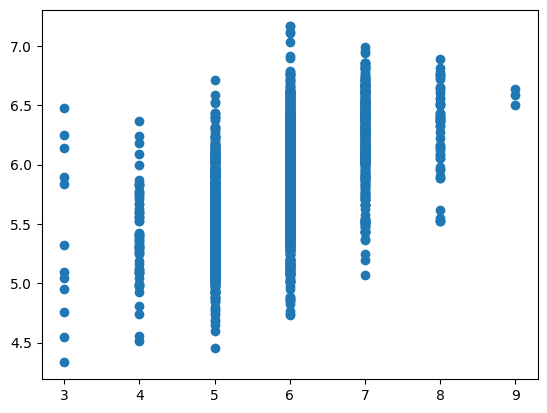

In [203]:
## Plotting
plt.scatter(Y_test,Y_predict)
plt.show()

In [211]:
r2_score(Y_test, Y_predict)

0.2874326217383434

In [212]:
mean_squared_error(Y_test, Y_predict)

0.5525754353015426

As the r2 score of the model does not explain much of the variance in the dependent variable. So let's try recursive feature elimination.

In [205]:
X1 = wine.drop(columns=['quality','density','pH'])
X1.shape

(6497, 9)

In [206]:
X1_train,X1_test,Y1_train,Y1_test = model_selection.train_test_split(X1, Y, test_size=0.4, random_state=0)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(3898, 9)
(2599, 9)
(3898,)
(2599,)


In [207]:
algo.fit(X1_train,Y1_train)
algo.coef_
algo.intercept_

2.5973484803397353

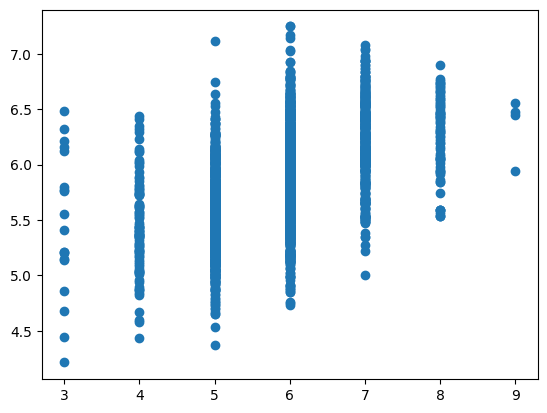

In [208]:
train_score = algo.score(X1_train,Y1_train)
Y1_predict = algo.predict(X1_test)
train_score
## Plotting
plt.scatter(Y1_test,Y1_predict)
plt.show()

In [209]:
r2_score(Y1_test, Y1_predict)

0.2711323225299018

In [210]:
mse = mean_squared_error(Y1_test, Y1_predict)
mse

0.5798996760224603

Even after eliminating some features on this dataset still the accuracy is low.